In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col = 'DATE')

In [5]:
df.columns=['Sales']
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


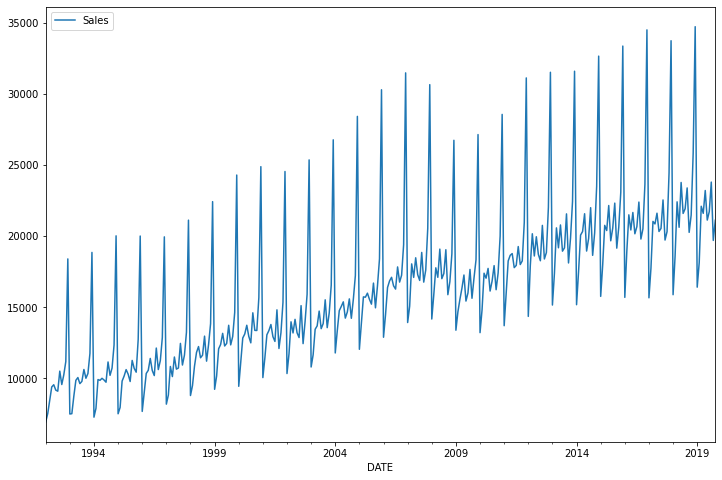

In [7]:
df.plot(figsize= (12,8))

In [8]:
len(df)

334

In [9]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [10]:
len(df)-18

316

In [11]:
test_size = 18
test_ind = len(df) - test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [13]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
scaled_train = scaler.transform ( train)
scaled_test = scaler.transform(test)

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
len(test)

18

In [20]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=2)

In [21]:
x,y = generator[0]

In [22]:
x

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]],

       [[0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266],
        [0.02047633]]])

In [23]:
y

array([[0.02047633],
       [0.02127505]])

In [24]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [25]:
x.shape

(2, 12, 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [27]:
n_features = 1

In [28]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2) #patience = nombre d 'epochs que nous allons attendre avant tout
#changement de croissance 

In [32]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [33]:
model.fit(generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
152/152 [==============================] - 3s 9ms/step - loss: 0.0475 - val_loss: 0.0062
Epoch 2/20
152/152 [==============================] - 1s 8ms/step - loss: 0.0243 - val_loss: 0.0044
Epoch 3/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0204 - val_loss: 0.0057
Epoch 4/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0111 - val_loss: 0.0027
Epoch 5/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0086 - val_loss: 0.0020
Epoch 6/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0086 - val_loss: 0.0020
Epoch 7/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 9/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 10/20
152/152 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0030

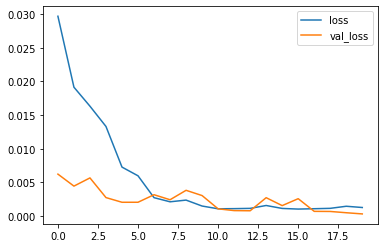

In [34]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [35]:
test_prediction=[]

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_prediction.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

In [36]:
true_prediction = scaler.inverse_transform(test_prediction)

In [37]:
test['prediction'] = true_prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
test

,Sales,prediction
DATE,,
2018-05-01,23764,21188.537388
2018-06-01,21589,20231.796708
2018-07-01,21919,20460.959608
2018-08-01,23381,22095.548629
2018-09-01,20260,19835.836900
2018-10-01,21473,20379.660131
2018-11-01,25831,23987.114263
2018-12-01,34706,32983.684466
2019-01-01,16410,16306.720528


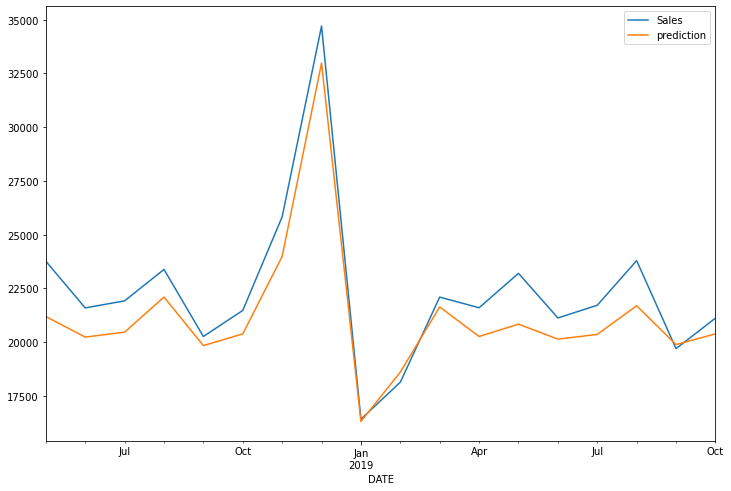

In [39]:
test.plot(figsize = (12,8))

In [40]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [41]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)


In [42]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=6)

Epoch 1/6
322/322 [==============================] - 3s 5ms/step - loss: 0.0417
Epoch 2/6
322/322 [==============================] - 2s 5ms/step - loss: 0.0161
Epoch 3/6
322/322 [==============================] - 2s 5ms/step - loss: 0.0120
Epoch 4/6
322/322 [==============================] - 2s 5ms/step - loss: 0.0048
Epoch 5/6
322/322 [==============================] - 2s 5ms/step - loss: 0.0027
Epoch 6/6
322/322 [==============================] - 2s 5ms/step - loss: 0.0038


In [43]:
forecast=[]

periods = 12 

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

In [44]:
forecast = full_scaler.inverse_transform(forecast)

In [45]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [46]:
forecast

array([[26443.35291529],
       [36347.36774158],
       [16875.31878424],
       [18730.06307435],
       [22060.97608757],
       [21655.62180138],
       [23112.67740917],
       [21280.8471756 ],
       [21887.28474188],
       [23790.27111101],
       [20192.24287724],
       [21631.24711752]])

In [47]:
forecast_index = pd.date_range(start='2019-11-01', periods = periods, freq = 'MS')

In [48]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [49]:
forecast_df = pd.DataFrame( data=forecast, index=forecast_index, columns=['Forecast'])

In [50]:
forecast_df

,Forecast
2019-11-01,26443.352915
2019-12-01,36347.367742
2020-01-01,16875.318784
2020-02-01,18730.063074
2020-03-01,22060.976088
2020-04-01,21655.621801
2020-05-01,23112.677409
2020-06-01,21280.847176
2020-07-01,21887.284742
2020-08-01,23790.271111


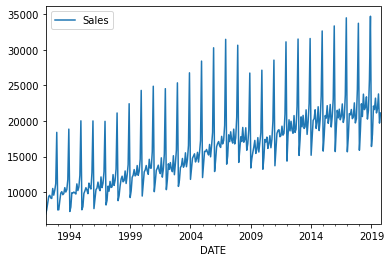

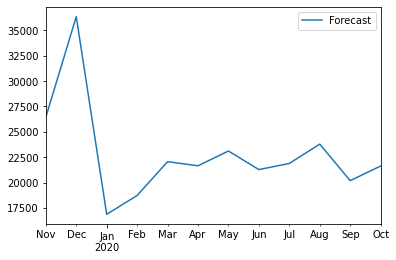

In [51]:
df.plot()
forecast_df.plot()

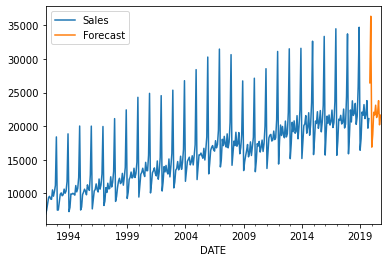

In [52]:
ax = df.plot()
forecast_df.plot(ax=ax)

(0.0, 1.0)

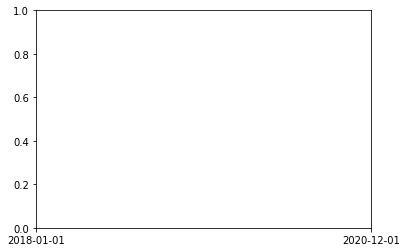

In [53]:
plt.xlim('2018-01-01', '2020-12-01')